<a href="https://colab.research.google.com/github/matchbou/kaggle-study-20190410/blob/master/Travelling%20Santa%202018%20Using%20Understanding%20the%20problem%20and%20some%20sample%20paths-201904121326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#GPU 設定確認

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()


  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.9 GB  | Proc size: 114.3 MB
GPU RAM Free: 11441MB | Used: 0MB | Util   0% | Total 11441MB


In [2]:
#os確認
!cat /etc/issue
#メモリ確認
!free -h
#CPUスペック確認
!cat /proc/cpuinfo
#GPUスペック確認
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information
#Colab起動後経過時間
!cat /proc/uptime | awk '{print $1 /60 /60 /24 "days (" $1 "sec)"}'
    
    

Ubuntu 18.04.2 LTS \n \l

              total        used        free      shared  buff/cache   available
Mem:            12G        404M         10G        900K        1.7G         12G
Swap:            0B          0B          0B
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat arch_cap

In [0]:
# https://www.kaggle.com/seshadrikolluri/understanding-the-problem-and-some-sample-paths
# Understanding the problem and some sample paths

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matchbou","key":"0bb292e80b8f97a13913b333aa348a4a"}'}

In [5]:
!pwd

/content


In [6]:
!ls -a

.  ..  .config	kaggle.json  sample_data


In [0]:
#!rm kaggle.json
#!mv 'kaggle (1).json' kaggle.json

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [9]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
# kaggleデータ置き場とjupyernoteのカレントディレクトリフォルダを作成

!mkdir ./input
!mkdir ./notebook

In [12]:
!pwd 

/content


In [13]:
!ls -a

.  ..  .config	input  kaggle.json  notebook  sample_data


In [0]:
#osライブラリ読込してinputに移動⇒kaggleデータもダウンロード　⇒ notebookフォルダに移動
import os
os.chdir('input')




In [15]:
#https://www.kaggle.com/c/titanic/data
!kaggle competitions download -c traveling-santa-2018-prime-paths



  0% 0.00/3.64M [00:00<?, ?B/s]
100% 3.64M/3.64M [00:00<00:00, 123MB/s]
  0% 0.00/411k [00:00<?, ?B/s]
100% 411k/411k [00:00<00:00, 136MB/s]


In [0]:
os.chdir('../notebook')

In [17]:
!pwd

/content/notebook


In [18]:
!ls -a ../input

.  ..  cities.csv.zip  sample_submission.csv.zip


In [19]:
!unzip ../input/cities.csv.zip -d ../input

Archive:  ../input/cities.csv.zip
  inflating: ../input/cities.csv     


In [20]:
!unzip ../input/sample_submission.csv.zip -d ../input

Archive:  ../input/sample_submission.csv.zip
  inflating: ../input/sample_submission.csv  


In [21]:
!ls  ../input

cities.csv  cities.csv.zip  sample_submission.csv  sample_submission.csv.zip


In [22]:
#上記操作の結果以下のディレクトリ配置となる

# /content/notebook このipynbのカレントディレクトリ
# /content/input カグルからダウンロードしたcsvファイルの置き場所

!pwd
!ls -a ../input


/content/notebook
.   cities.csv	    sample_submission.csv
..  cities.csv.zip  sample_submission.csv.zip


In [0]:
#ここからカーネルの内容に踏み込む為のTSP Solver concordeのインストール


In [24]:
!pip install git+https://github.com/cehorn/GLRM.git

  Cloning https://github.com/cehorn/GLRM.git to /tmp/pip-req-build-i4o05rce
  Stored in directory: /tmp/pip-ephem-wheel-cache-6y1k1y1_/wheels/2e/7c/1d/3bbefe79335a1ecc7affcb9ec174a14cd9ba908738aecca7eb
Successfully built GLRM


In [0]:
#os.chdir('..')

#!pwd

os.makedirs('../git')

os.chdir('../git')



In [26]:
!git clone https://github.com/jvkersch/pyconcorde

Cloning into 'pyconcorde'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 195 (delta 0), reused 0 (delta 0), pack-reused 190
Receiving objects: 100% (195/195), 108.52 KiB | 597.00 KiB/s, done.
Resolving deltas: 100% (101/101), done.


In [27]:
!ls -a 



.  ..  pyconcorde


In [0]:
os.chdir('pyconcorde')

In [29]:
!pip install -e .

Obtaining file:///content/git/pyconcorde
  Running setup.py develop for pyconcorde


In [30]:
!pwd

/content/git/pyconcorde


In [0]:
os.chdir('../../notebook')

In [0]:
#ようやくkernelの中身に

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [34]:
df_cities = pd.read_csv('../input/cities.csv')
df_cities.head()

CityId            X            Y
0       0   316.836739  2202.340707
1       1  4377.405972   336.602082
2       2  3454.158198  2820.053011
3       3  4688.099298  2935.898056
4       4  1010.696952  3236.750989

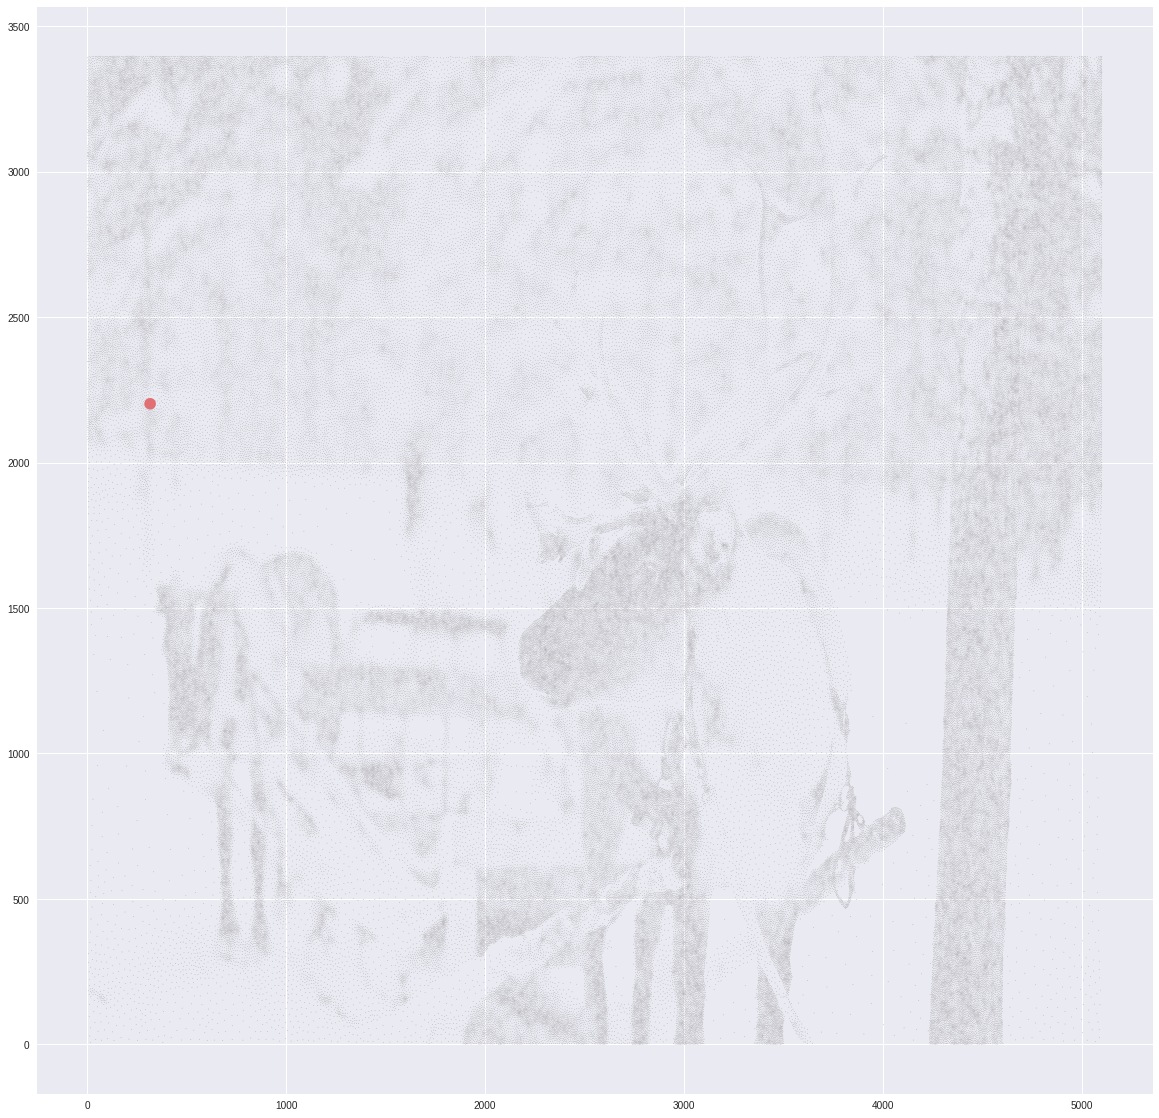

In [35]:
fig = plt.figure(figsize=(20,20))
#cmap, norm = from_levels_and_colors([0.0, 0.5, 1.5], ['red', 'black'])
plt.scatter(df_cities['X'],df_cities['Y'],marker = '.',c=(df_cities.CityId != 0).astype(int), cmap='Set1', alpha = 0.6, s = 500*(df_cities.CityId == 0).astype(int)+1)
plt.show()

In [0]:
# To improve the performance, instead of checking whether each member is a prime, 
# we first a generate a list where each element tells whether the number indicated 
# by the position is a prime or not. 

# using sieve of eratosthenes
def sieve_of_eratosthenes(n):
    primes = [True for i in range(n+1)] # Start assuming all numbers are primes
    primes[0] = False # 0 is not a prime
    primes[1] = False # 1 is not a prime
    for i in range(2,int(np.sqrt(n)) + 1):
        if primes[i]:
            k = 2
            while i*k <= n:
                primes[i*k] = False
                k += 1
    return(primes)
prime_cities = sieve_of_eratosthenes(max(df_cities.CityId))

In [37]:
def total_distance(dfcity,path):
    prev_city = path[0]
    total_distance = 0
    step_num = 1
    for city_num in path[1:]:
        next_city = city_num
        total_distance = total_distance + \
            np.sqrt(pow((dfcity.X[city_num] - dfcity.X[prev_city]),2) + pow((dfcity.Y[city_num] - dfcity.Y[prev_city]),2)) * \
            (1+ 0.1*((step_num % 10 == 0)*int(not(prime_cities[prev_city]))))
        prev_city = next_city
        step_num = step_num + 1
    return total_distance

dumbest_path = list(df_cities.CityId[:].append(pd.Series([0])))
print('Total distance with the dumbest path is '+ "{:,}".format(total_distance(df_cities,dumbest_path)))

Total distance with the dumbest path is 446,884,407.5212135


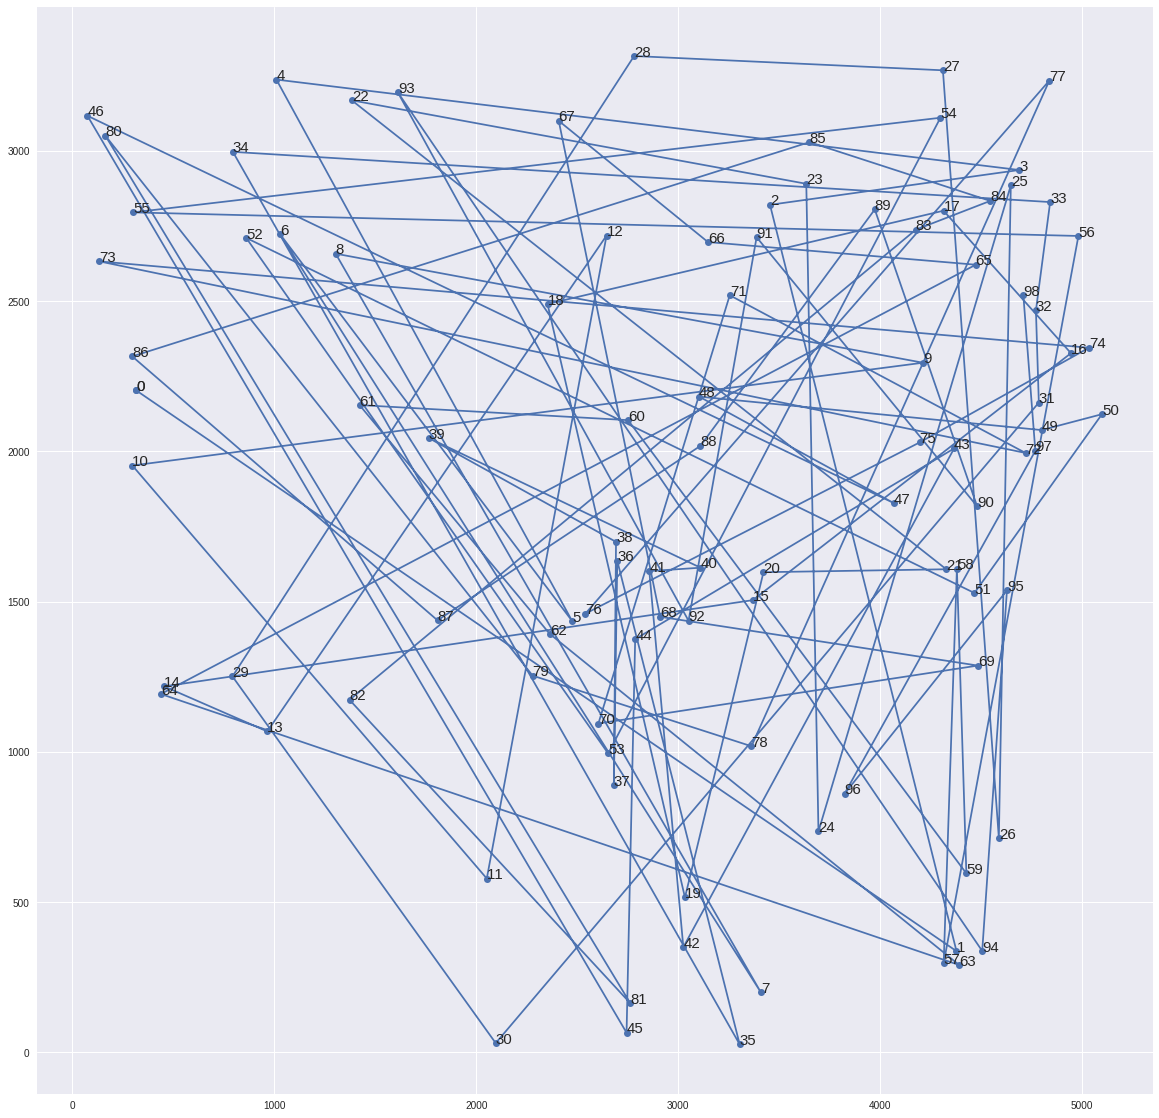

In [38]:
df_path = pd.merge_ordered(pd.DataFrame({'CityId':dumbest_path}),df_cities,on=['CityId'])
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path.iloc[0:100,]['X'], df_path.iloc[0:100,]['Y'],marker = 'o')
for i, txt in enumerate(df_path.iloc[0:100,]['CityId']):
    ax.annotate(txt, (df_path.iloc[0:100,]['X'][i], df_path.iloc[0:100,]['Y'][i]),size = 15)

In [39]:
sorted_cities = list(df_cities.iloc[1:,].sort_values(['X','Y'])['CityId'])
sorted_cities = [0] + sorted_cities + [0]
print('Total distance with the sorted city path is '+ "{:,}".format(total_distance(df_cities,sorted_cities)))

Total distance with the sorted city path is 196,478,811.25956938


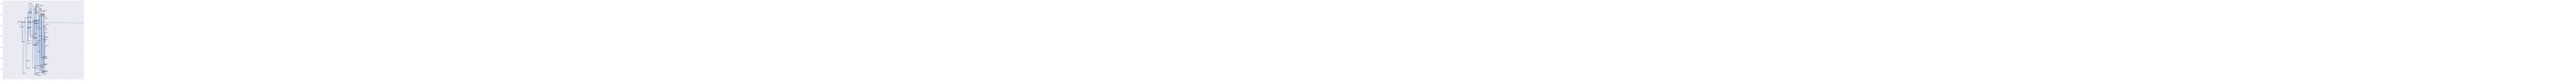

In [40]:
df_path = pd.DataFrame({'CityId':sorted_cities}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.set_xlim(0,10)
ax.plot(df_path.iloc[0:100,]['X'], df_path.iloc[0:100,]['Y'],marker = 'o')
for i, txt in enumerate(df_path.iloc[0:100,]['CityId']):
    ax.annotate(txt, (df_path.iloc[0:100,]['X'][i], df_path.iloc[0:100,]['Y'][i]),size = 15)

In [41]:
df_cities['Ycuts'] = pd.cut(df_cities.Y,300)
df_cities['Xcuts'] = pd.cut(df_cities.X,300)
grid_sorted_cities = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'])['CityId'])
grid_sorted_cities =  [0] + grid_sorted_cities + [0]
print('Total distance with the sorted cities with a grid path is '+ "{:,}".format(total_distance(df_cities,grid_sorted_cities)))

Total distance with the sorted cities with a grid path is 3,226,331.4903367283


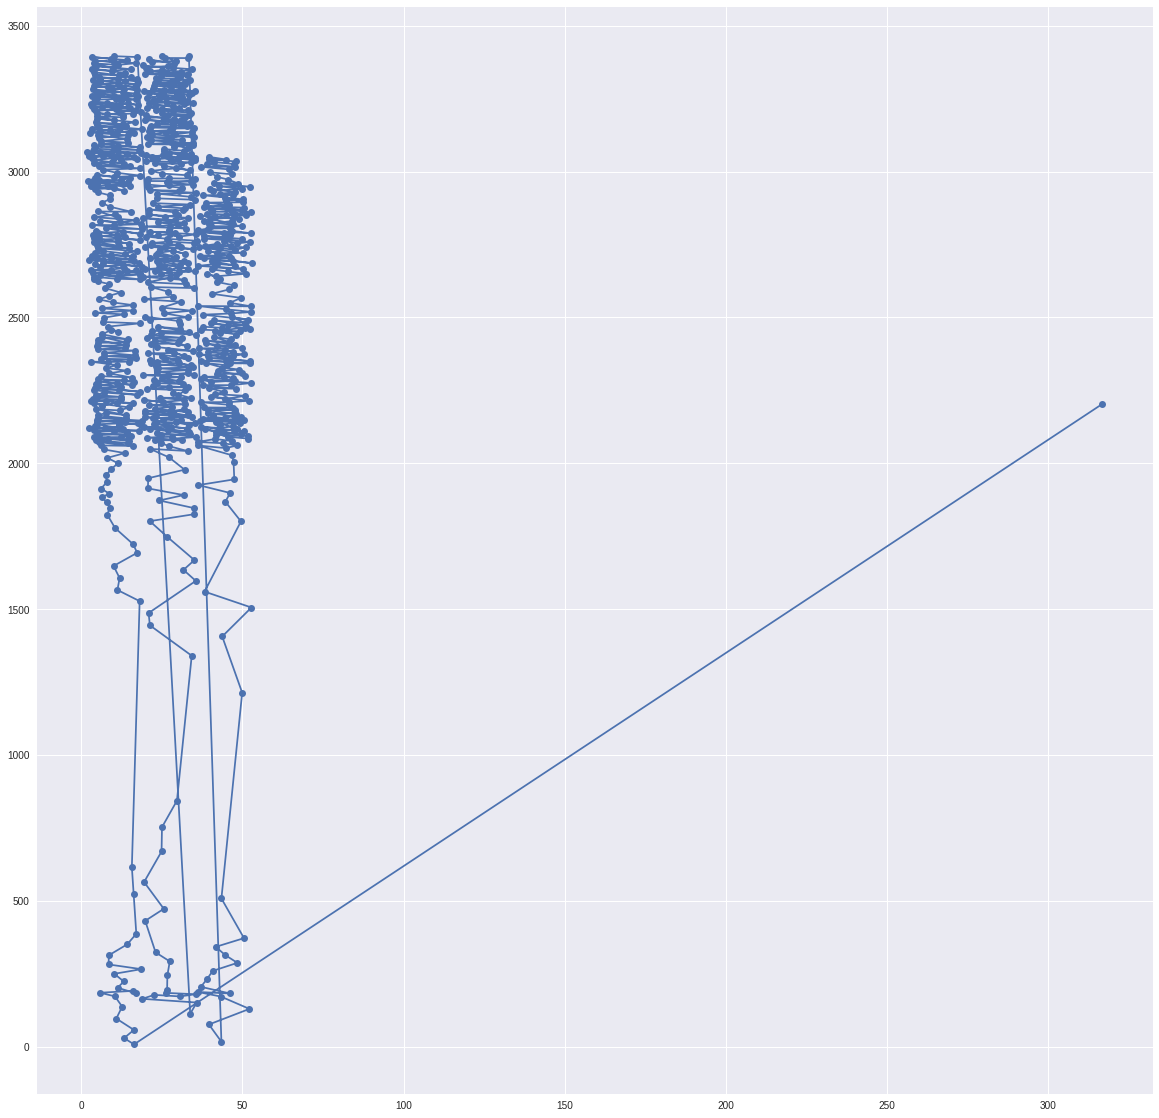

In [42]:
df_path = pd.DataFrame({'CityId':grid_sorted_cities}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path.iloc[0:1000,]['X'], df_path.iloc[0:1000,]['Y'],marker = 'o')

In [43]:
zigzag_sorted_cities1 = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'])['CityId'])
zigzag_sorted_cities2 = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'], ascending = [True,False,True,True])['CityId'])
chooser_pattern = list(df_cities.iloc[1:].sort_values(['Xcuts']).groupby(['Xcuts']).ngroup()%2)

zigzag_cities = [zigzag_sorted_cities1[i] if chooser_pattern[i] == 0 else zigzag_sorted_cities2[i] for i in range(len(chooser_pattern))]
zigzag_cities =  [0] + zigzag_cities + [0]
print('Total distance with the Zig-Zag with grid city path is '+ "{:,}".format(total_distance(df_cities,zigzag_cities)))

Total distance with the Zig-Zag with grid city path is 2,233,635.0317220334


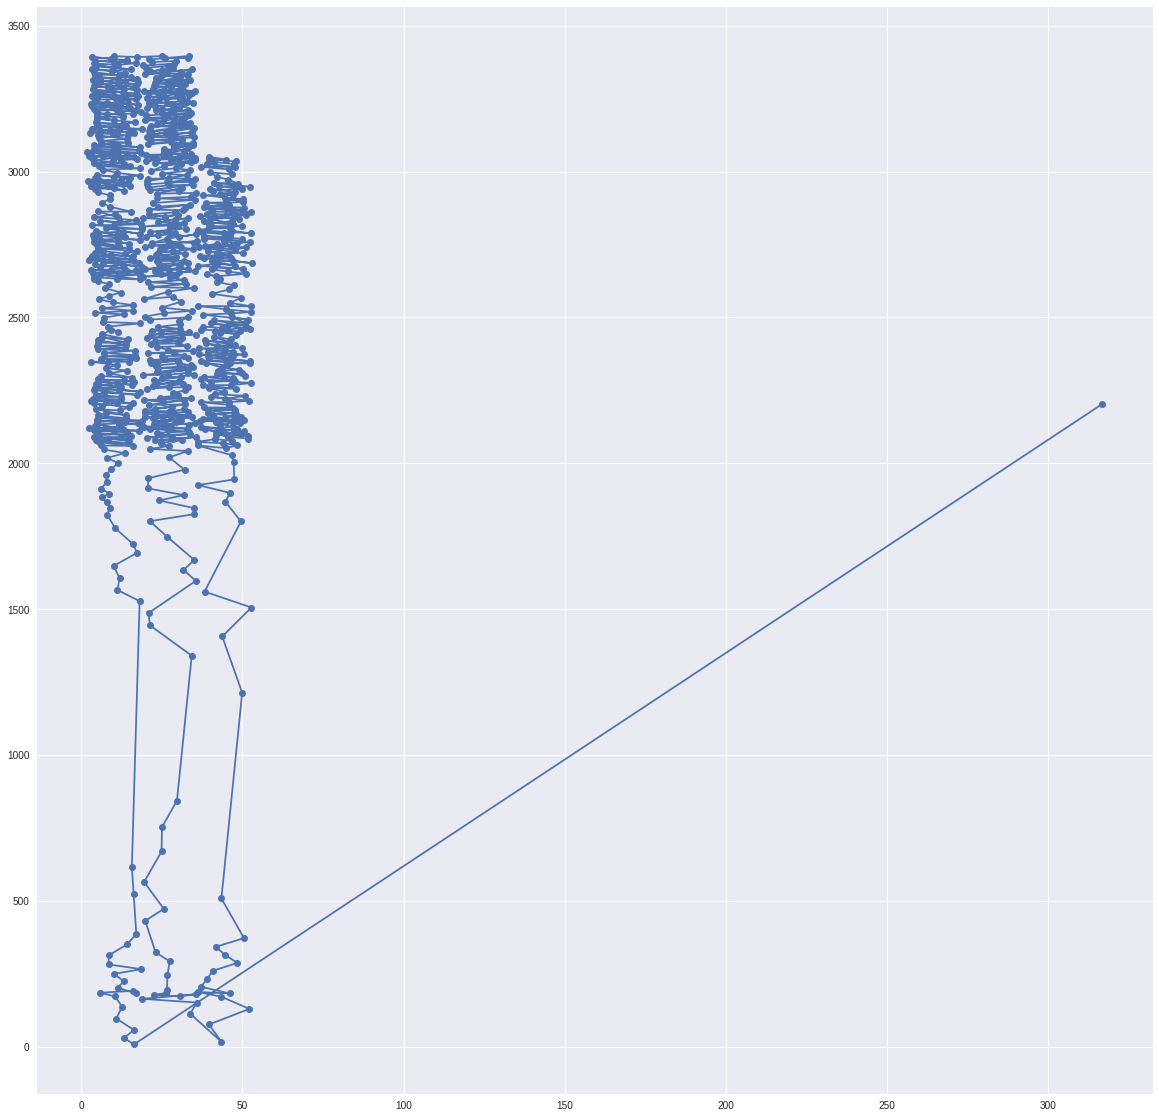

In [44]:
df_path = pd.DataFrame({'CityId':zigzag_cities}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path.iloc[0:1000,]['X'], df_path.iloc[0:1000,]['Y'],marker = 'o')

In [45]:
for i in range(100,600,100):
    for j in range(100,600,100):
        df_cities['Ycuts'] = pd.cut(df_cities.Y,j)
        df_cities['Xcuts'] = pd.cut(df_cities.X,i)
        zigzag_sorted_cities1 = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'])['CityId'])
        zigzag_sorted_cities2 = list(df_cities.iloc[1:].sort_values(['Xcuts','Ycuts','X','Y'], ascending = [True,False,True,True])['CityId'])
        chooser_pattern = list(df_cities.iloc[1:].sort_values(['Xcuts']).groupby(['Xcuts']).ngroup()%2)

        zigzag_cities = [zigzag_sorted_cities1[i] if chooser_pattern[i] == 0 else zigzag_sorted_cities2[i] for i in range(len(chooser_pattern))]
        zigzag_cities =  [0] + zigzag_cities + [0]
        print('Total distance with the Zig-Zag with grid city path with grid size (' + str(i) + ',' + str(j) + ") is {:,}".format(total_distance(df_cities,zigzag_cities)))

Total distance with the Zig-Zag with grid city path with grid size (100,100) is 3,243,001.24552974
Total distance with the Zig-Zag with grid city path with grid size (100,200) is 2,483,012.2590593975
Total distance with the Zig-Zag with grid city path with grid size (100,300) is 2,458,138.678978236
Total distance with the Zig-Zag with grid city path with grid size (100,400) is 2,600,638.502037033
Total distance with the Zig-Zag with grid city path with grid size (100,500) is 2,779,870.5123764514
Total distance with the Zig-Zag with grid city path with grid size (200,100) is 3,354,740.6090092813
Total distance with the Zig-Zag with grid city path with grid size (200,200) is 2,429,013.5317182303
Total distance with the Zig-Zag with grid city path with grid size (200,300) is 2,247,440.072765479
Total distance with the Zig-Zag with grid city path with grid size (200,400) is 2,242,396.9024366746
Total distance with the Zig-Zag with grid city path with grid size (200,500) is 2,281,677.008044

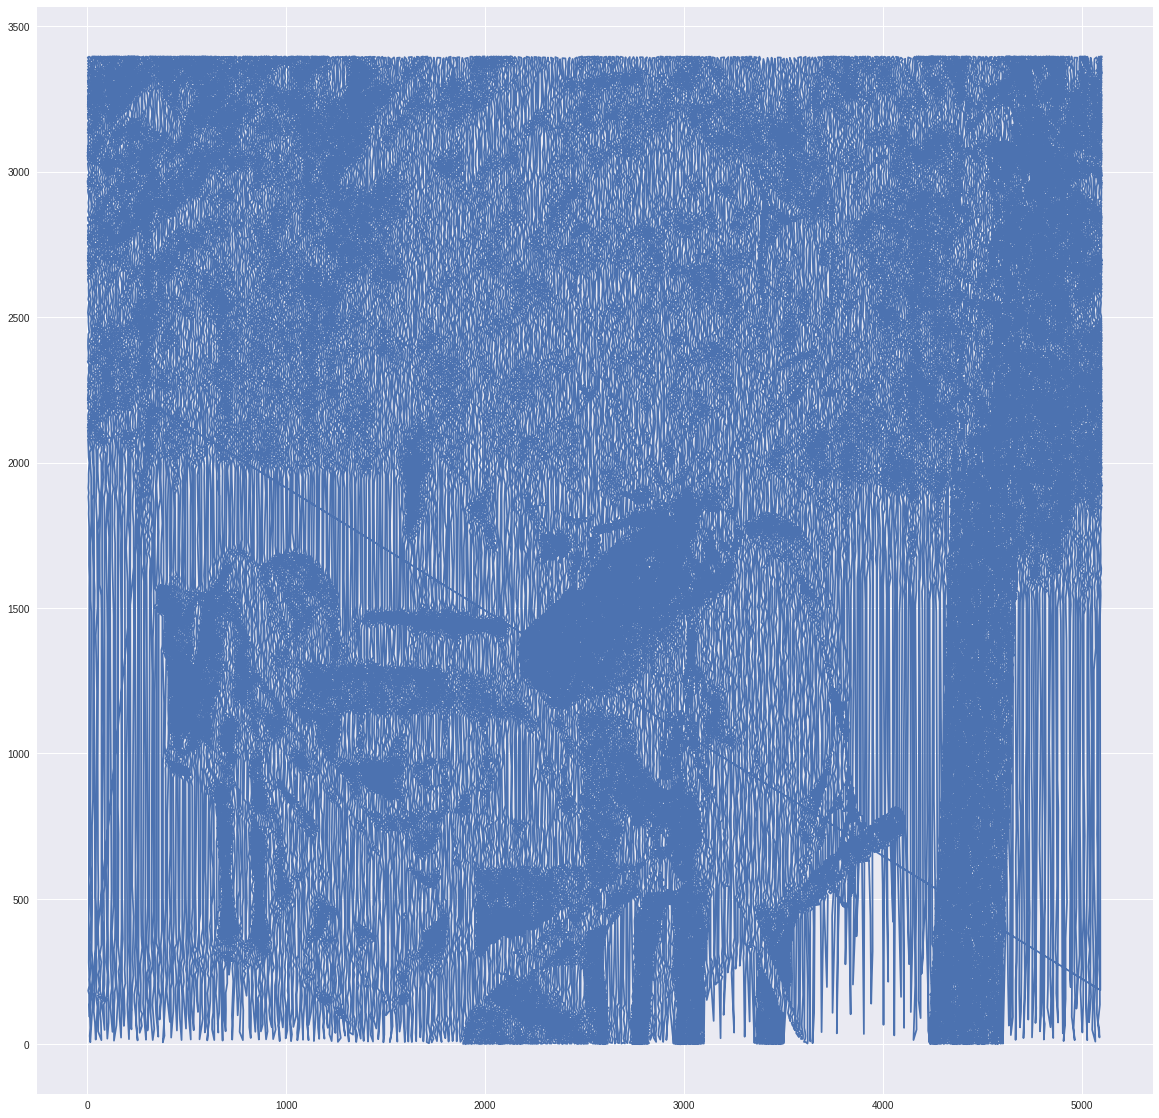

In [46]:
df_path = pd.DataFrame({'CityId':zigzag_cities}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path['X'], df_path['Y'])

In [47]:
# Function from XYZT's Kernel on the same topic. 
def nearest_neighbour():
    cities = pd.read_csv("../input/cities.csv")
    ids = cities.CityId.values[1:]
    xy = np.array([cities.X.values, cities.Y.values]).T[1:]
    path = [0,]
    while len(ids) > 0:
        last_x, last_y = cities.X[path[-1]], cities.Y[path[-1]]
        dist = ((xy - np.array([last_x, last_y]))**2).sum(-1)
        nearest_index = dist.argmin()
        path.append(ids[nearest_index])
        ids = np.delete(ids, nearest_index, axis=0)
        xy = np.delete(xy, nearest_index, axis=0)
    path.append(0)
    return path

nnpath = nearest_neighbour()
print('Total distance with the Nearest Neighbor path '+  "is {:,}".format(total_distance(df_cities,nnpath)))

Total distance with the Nearest Neighbor path is 1,812,602.1861388374


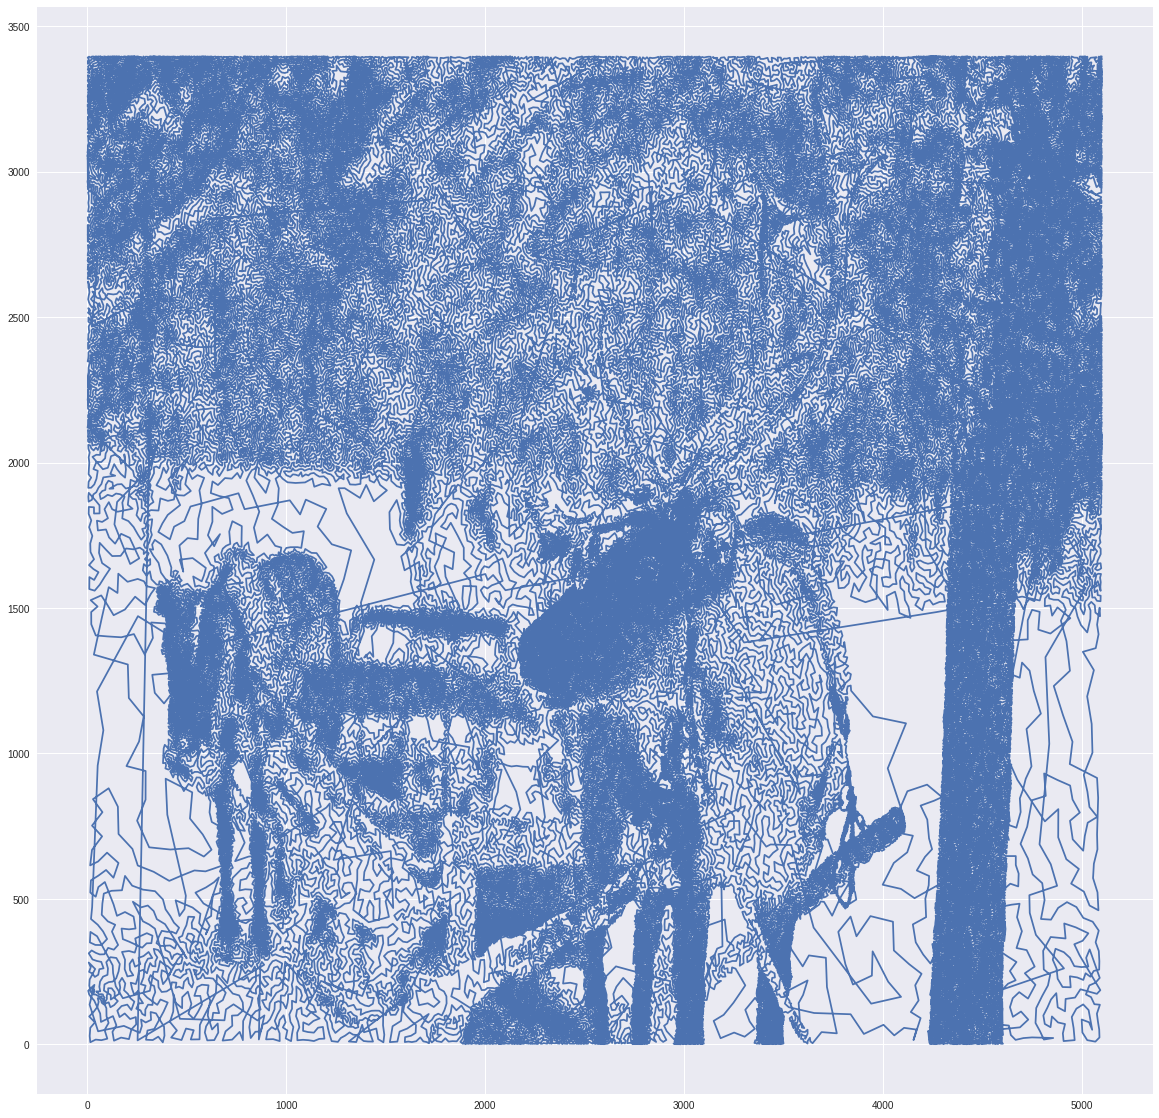

In [48]:
df_path = pd.DataFrame({'CityId':nnpath}).merge(df_cities,how = 'left')
fig, ax = plt.subplots(figsize=(20,20))
ax.plot(df_path['X'], df_path['Y'])

In [49]:
#Iteration 7: Nearest Neighbor / Greedy Algorithm With Prime Swaps

nnpath_with_primes = nnpath.copy()
for index in range(20,len(nnpath_with_primes)-30):
    city = nnpath_with_primes[index]
    if (prime_cities[city] &  ((index+1) % 10 != 0)):        
        for i in range(-1,3):
            tmp_path = nnpath_with_primes.copy()
            swap_index = (int((index+1)/10) + i)*10 - 1
            tmp_path[swap_index],tmp_path[index] = tmp_path[index],tmp_path[swap_index]
            if total_distance(df_cities,tmp_path[min(swap_index,index) - 1 : max(swap_index,index) + 2]) < total_distance(df_cities,nnpath_with_primes[min(swap_index,index) - 1 : max(swap_index,index) + 2]):
                nnpath_with_primes = tmp_path.copy() 
                break
print('Total distance with the Nearest Neighbor With Prime Swaps '+  "is {:,}".format(total_distance(df_cities,nnpath_with_primes)))

Total distance with the Nearest Neighbor With Prime Swaps is 1,811,953.6824856116


In [0]:
pd.DataFrame({'Path':nnpath_with_primes}).to_csv('nnpath_with_primes.csv',index  = False)

In [0]:
from google.colab import files


files.download('nnpath_with_primes.csv')

In [0]:
#** More to come .. **